In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset into a DataFrame
df = pd.read_csv("Coursera_trainings.csv")


In [15]:
# Display the first few rows of the dataset
df.shape


(3532, 9)

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_course,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_id,3522.0,NaN,NaN,NaN,1761.5,1016.858151,1.0,881.25,1761.5,2641.75,3522.0
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University,3522,185,Coursera Project Network,562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difficulty Level,3522,5,Beginner,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Course Rating,3522,31,4.7,740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Course URL,3522,3424,https://www.coursera.org/learn/gcp-fundamentals,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Course Description,3522,3397,This course introduces you to important concep...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Display the first few rows of the dataset
df.head ()

,id_course,course_id,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,NaN,1.0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,NaN,2.0,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,NaN,3.0,Silicon Thin Film Solar Cells,ecole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,NaN,4.0,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,NaN,5.0,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [17]:
# Display information about the dataset (data types, non-null counts, etc.)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_course           0 non-null      float64
 1   course_id           3522 non-null   float64
 2   Course Name         3522 non-null   object 
 3   University          3522 non-null   object 
 4   Difficulty Level    3522 non-null   object 
 5   Course Rating       3522 non-null   object 
 6   Course URL          3522 non-null   object 
 7   Course Description  3522 non-null   object 
 8   Skills              3522 non-null   object 
dtypes: float64(2), object(7)
memory usage: 248.5+ KB


In [18]:
df.describe()

,id_course,course_id
count,0.0,3522.000000
mean,NaN,1761.500000
std,NaN,1016.858151
min,NaN,1.000000
25%,NaN,881.250000
50%,NaN,1761.500000
75%,NaN,2641.750000
max,NaN,3522.000000


In [19]:
# Check for missing values
df.isnull().sum()




id_course             3532
course_id               10
Course Name             10
University              10
Difficulty Level        10
Course Rating           10
Course URL              10
Course Description      10
Skills                  10
dtype: int64

In [25]:
# Find rows with missing values excluding the first column
missing_rows = df[df.iloc[:, 1:].isnull().any(axis=1)]

# Display rows with missing values
missing_rows


,id_course,course_id,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Find the duplicates

df.duplicated().sum()

9

In [29]:
# Find duplicated rows
duplicated_rows = df[df.duplicated()]

# Count occurrences of each duplicated row
duplicated_counts = df.duplicated().value_counts()

# Display duplicated rows and their counts
print("Duplicated Rows:")
duplicated_rows




Duplicated Rows:


,id_course,course_id,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Check if there are any duplicated values
df.duplicated().any()

True

In [31]:
# Find duplicated values
duplicated_values = df[df.duplicated(keep=False)]

# Count occurrences of each duplicated value
duplicated_counts = duplicated_values.groupby(duplicated_values.columns.tolist()).size()

# Display duplicated values and their occurrences
print("Duplicated Values:")
print(duplicated_values)

print("\nCounts of Duplicated Values:")
print(duplicated_counts)


Duplicated Values:
      id_course  course_id Course Name University Difficulty Level  \
3522        NaN        NaN         NaN        NaN              NaN   
3523        NaN        NaN         NaN        NaN              NaN   
3524        NaN        NaN         NaN        NaN              NaN   
3525        NaN        NaN         NaN        NaN              NaN   
3526        NaN        NaN         NaN        NaN              NaN   
3527        NaN        NaN         NaN        NaN              NaN   
3528        NaN        NaN         NaN        NaN              NaN   
3529        NaN        NaN         NaN        NaN              NaN   
3530        NaN        NaN         NaN        NaN              NaN   
3531        NaN        NaN         NaN        NaN              NaN   

     Course Rating Course URL Course Description Skills  
3522           NaN        NaN                NaN    NaN  
3523           NaN        NaN                NaN    NaN  
3524           NaN        NaN       

In [15]:
#Summarizing the Data - Calculate frequency counts for categorical variables
for column in df.select_dtypes(include=['object']).columns:
    print(f"Frequency counts for {column}:")
    print(df[column].value_counts())
    print()


Frequency counts for Course Name:
Google Cloud Platform Fundamentals: Core Infrastructure    8
Introduction to Artificial Intelligence (AI)               4
Python for Data Science and AI                             4
The Art of Music Production                                4
What is Data Science?                                      4
                                                          ..
Technical Support Fundamentals                             1
Understanding the Music Business: What is Music Worth?     1
Gut Check: Exploring Your Microbiome                       1
Managerial Accounting Fundamentals                         1
Architecting with Google Kubernetes Engine: Production     1
Name: Course Name, Length: 3416, dtype: int64

Frequency counts for University:
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of C

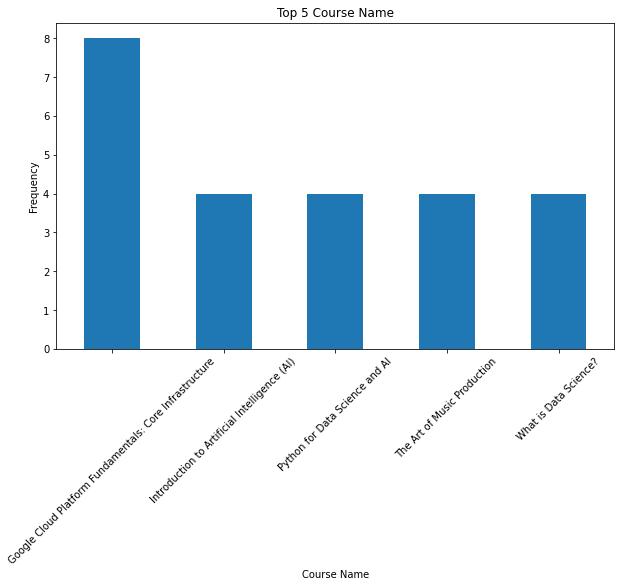

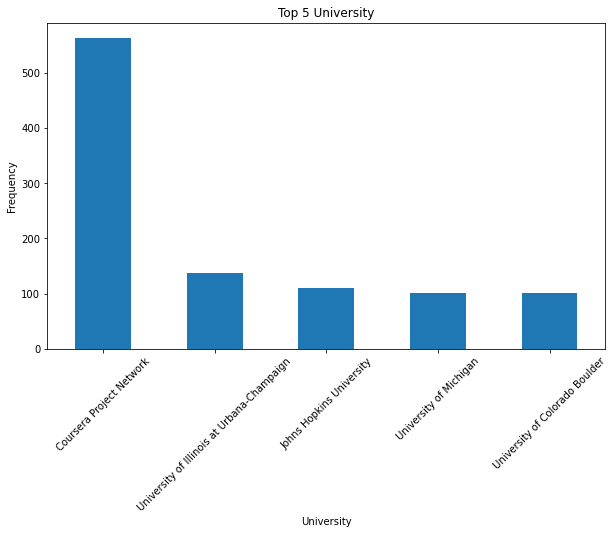

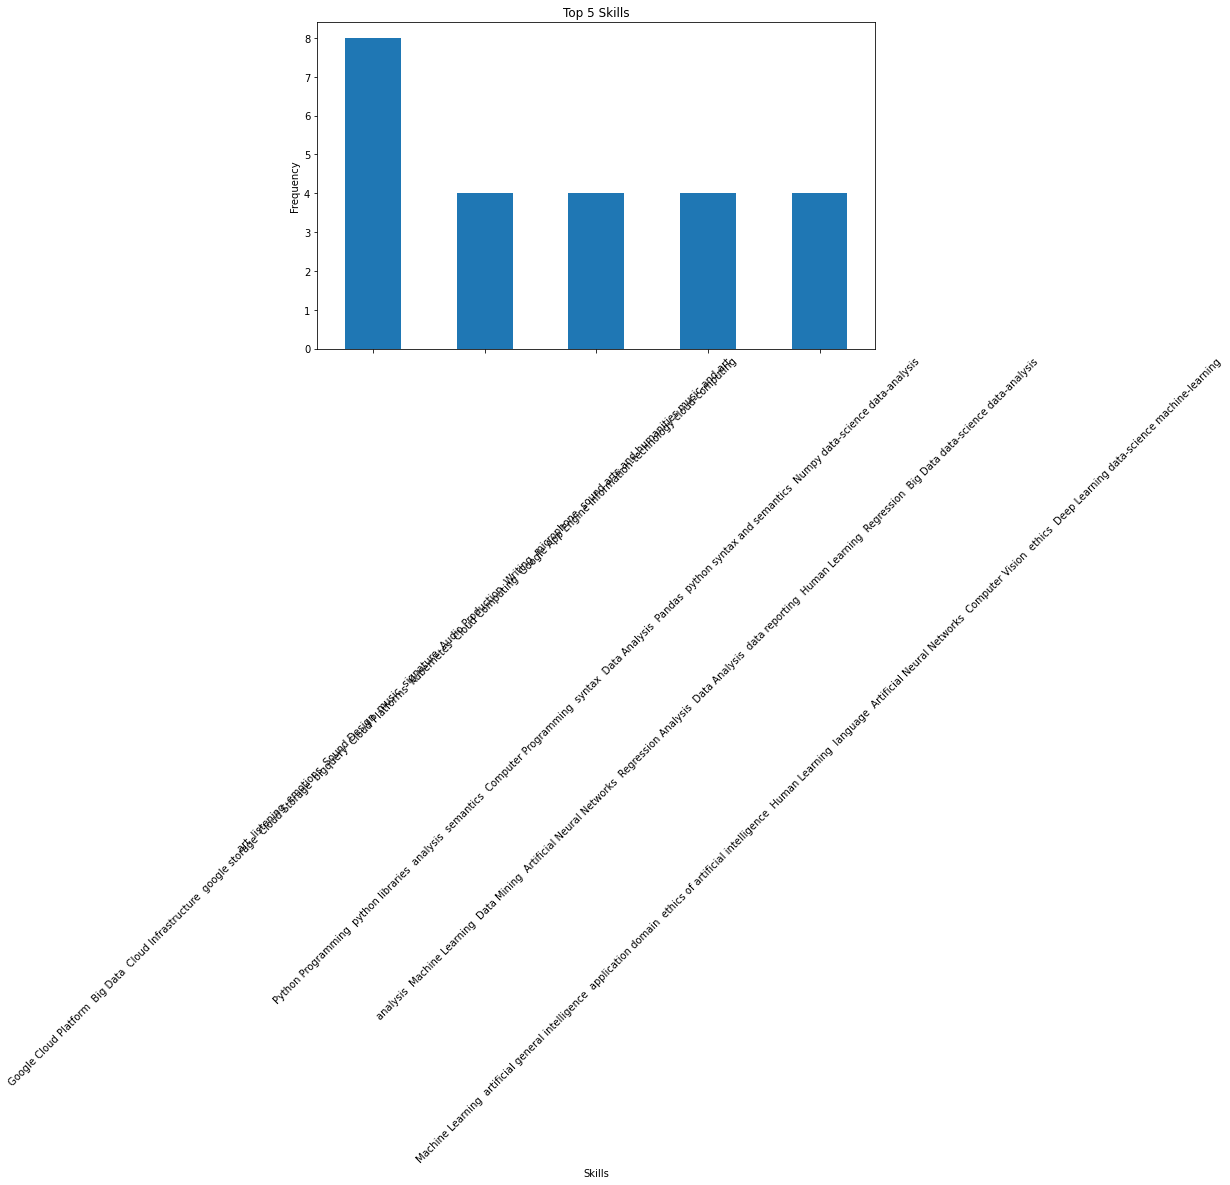

In [43]:
# Define the columns for which you want to plot the top features
columns_to_plot = ['Course Name', 'University', 'Skills']

# Plot the top five features for each column
for column in columns_to_plot:
    # Calculate frequency counts for the current column
    feature_counts = df[column].value_counts().head(5)
    
    # Plot bar plot for the top five features
    plt.figure(figsize=(10, 6))
    feature_counts.plot(kind='bar')
    plt.title(f'Top 5 {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


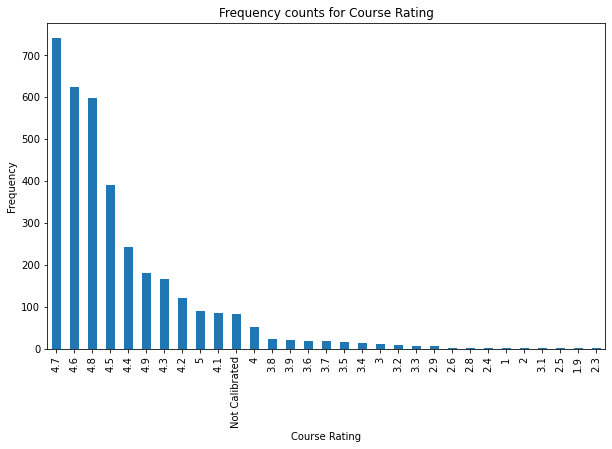

In [12]:
# Plot frequency counts for Course Rating
plt.figure(figsize=(10, 6))
df['Course Rating'].value_counts().plot(kind='bar')
plt.title('Frequency counts for Course Rating')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()

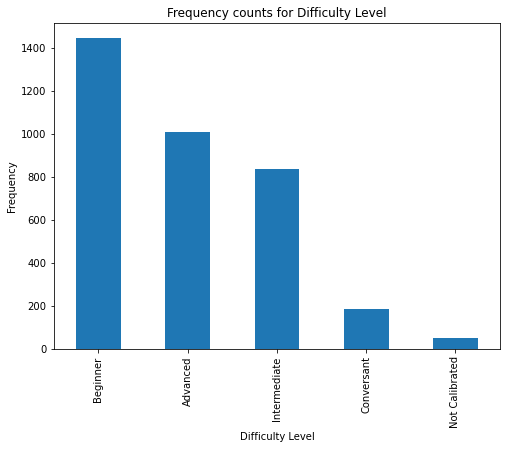

In [11]:
# Plot frequency counts for Difficulty Level
plt.figure(figsize=(8, 6))
df['Difficulty Level'].value_counts().plot(kind='bar')
plt.title('Frequency counts for Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Frequency')
plt.show()

In [27]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')
Numerical Variables:
['id_course', 'course_id']


id_course
Skew : nan


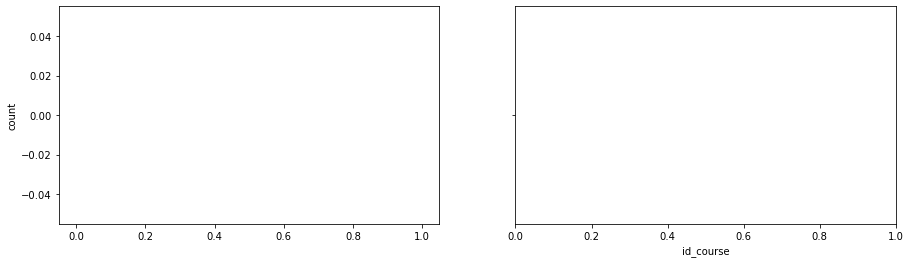

course_id
Skew : 0.0


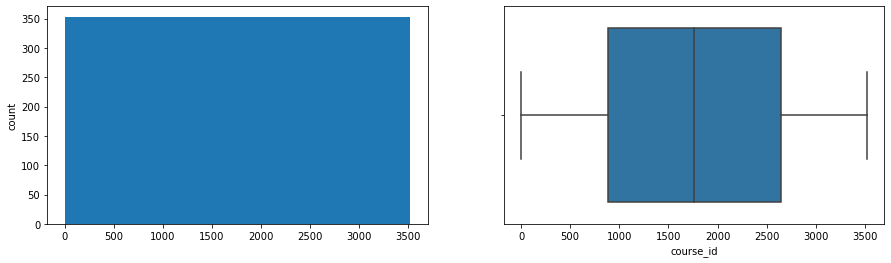

In [38]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

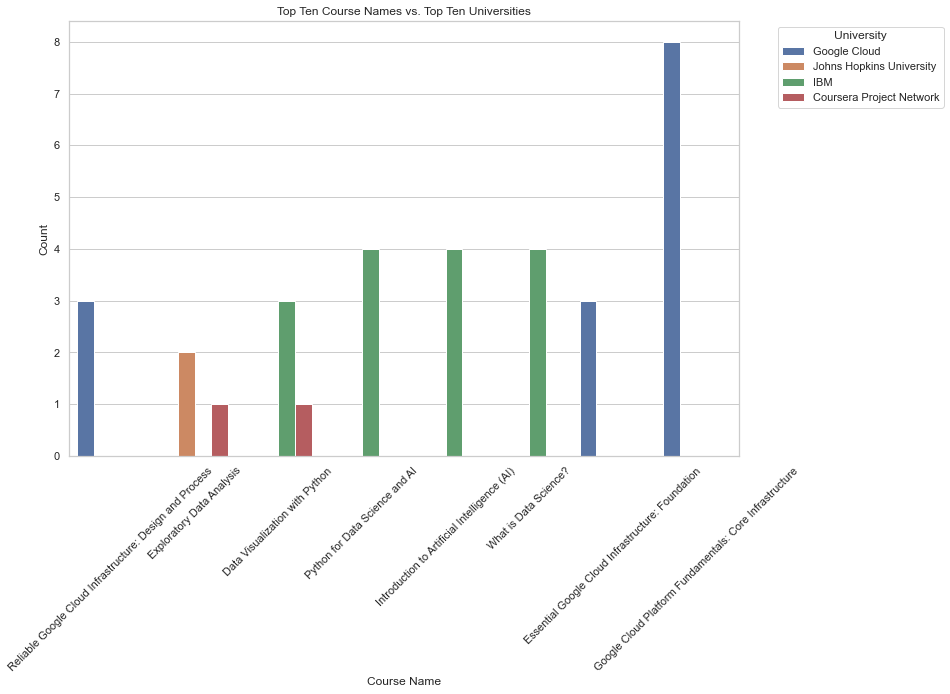

In [56]:


# Top 10 Course Names
top_course_names = df['Course Name'].value_counts().head(10).index

# Top 10 Universities
top_universities = df['University'].value_counts().head(10).index

# Create a DataFrame containing only the top five Course Names and top five Universities
top_data = df[df['Course Name'].isin(top_course_names) & df['University'].isin(top_universities)]

# Check if the DataFrame is empty
if not top_data.empty:
    # Create a stacked bar chart for the relationship between Course Name and University
    plt.figure(figsize=(12, 8))
    sns.countplot(x="Course Name", hue="University", data=top_data)
    plt.title("Top Ten Course Names vs. Top Ten Universities")
    plt.xlabel("Course Name")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='University', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("No data available for the selected top Course Names and Universities.")


C:\Users\hamza\AppData\Local\Temp\ipykernel_21528\384104406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['Course Rating'] = top_data['Course Rating'].astype(float)


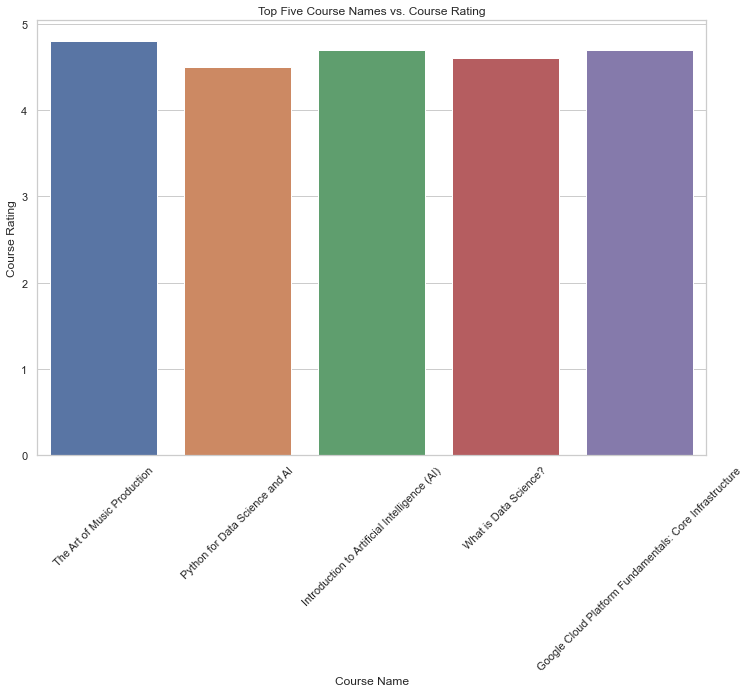

In [60]:
# Convert "Course Rating" to numeric (assuming it contains numeric values)
top_data['Course Rating'] = top_data['Course Rating'].astype(float)

# Check if the DataFrame is empty
if not top_data.empty:
    # Create a bar plot for the relationship between Course Name and Course Rating
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Course Name", y="Course Rating", data=top_data)
    plt.title("Top Five Course Names vs. Course Rating")
    plt.xlabel("Course Name")
    plt.ylabel("Course Rating")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("No data available for the selected top Course Names.")


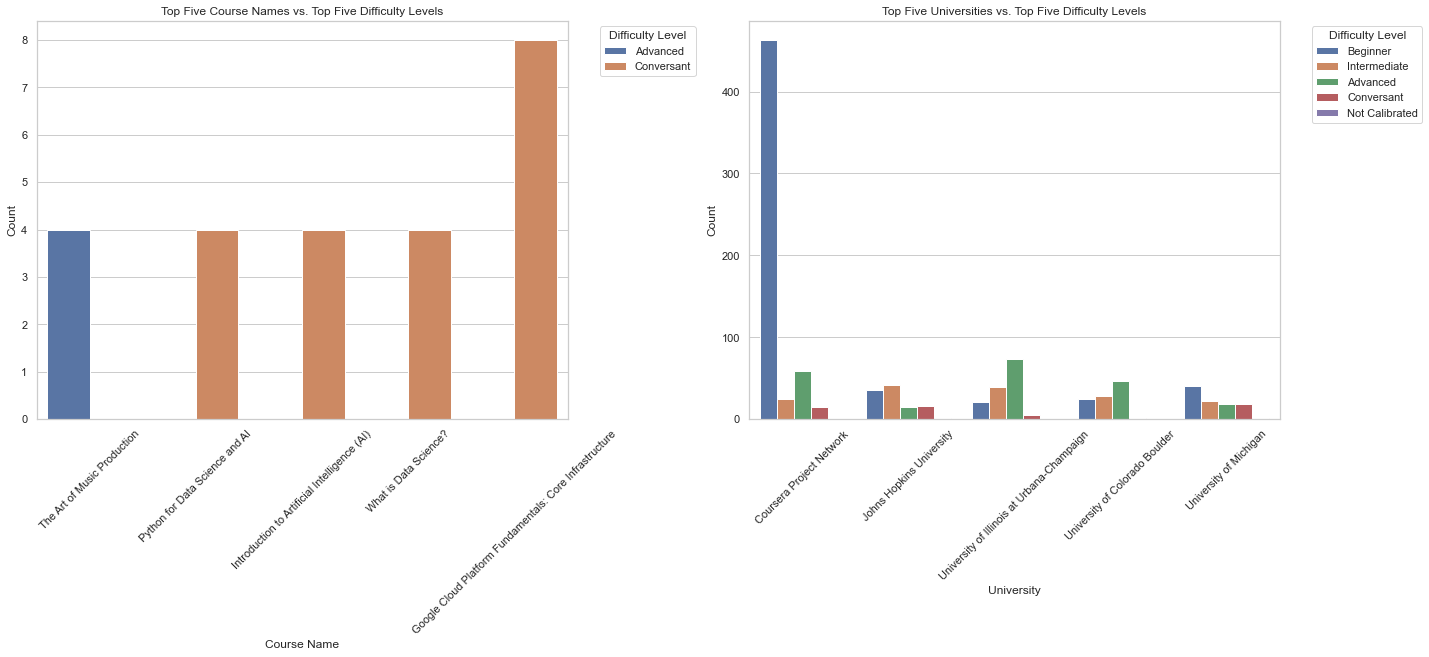

In [58]:


# Top five Course Names
top_course_names = df['Course Name'].value_counts().head(5).index

# Top five Universities
top_universities = df['University'].value_counts().head(5).index

# Top five Difficulty Levels
top_difficulty_levels = df['Difficulty Level'].value_counts().head(5).index

# Create separate DataFrames for each pair of variables
top_data_course_university = df[df['Course Name'].isin(top_course_names) & df['University'].isin(top_universities)]
top_data_course_difficulty = df[df['Course Name'].isin(top_course_names) & df['Difficulty Level'].isin(top_difficulty_levels)]
top_data_university_difficulty = df[df['University'].isin(top_universities) & df['Difficulty Level'].isin(top_difficulty_levels)]
top_data_university_rating = df[df['University'].isin(top_universities)]

# Plot the relationships between variables
plt.figure(figsize=(20, 15))

# Relationship between Course Name and University

# Relationship between Course Name and Difficulty Level
plt.subplot(2,2,1)
sns.countplot(x="Course Name", hue="Difficulty Level", data=top_data_course_difficulty)
plt.title("Top Five Course Names vs. Top Five Difficulty Levels")
plt.xlabel("Course Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Difficulty Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Relationship between University and Difficulty Level
plt.subplot(2, 2, 2)
sns.countplot(x="University", hue="Difficulty Level", data=top_data_university_difficulty)
plt.title("Top Five Universities vs. Top Five Difficulty Levels")
plt.xlabel("University")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Difficulty Level', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


In [79]:
# Select two categorical variables from your dataset
variable1 = 'Course Name'
variable2 = 'Difficulty Level'

# Create the confusion matrix
confusion_matrix = pd.crosstab(df[variable1], df[variable2])

print("Confusion Matrix:")
confusion_matrix


Confusion Matrix:


Difficulty Level,Advanced,Beginner,Conversant,Intermediate,Not Calibrated
Course Name,,,,,
"""Making"" Progress Teach-Out",0,1,0,0,0
(Non) Status quo Attitudes with NetLogo,0,0,1,0,0
1E Test: How Computers Work,1,0,0,0,0
3-Axis Machining with Autodesk Fusion 360,0,0,0,1,0
3D Art and Audio Pipeline,1,0,0,0,0
...,...,...,...,...,...
iOS App Development Basics,0,0,0,1,0
iOS App Store & In-App Purchases,1,0,0,0,0
iOS Project: Transreality Game,1,0,0,0,0
